# Exercises:

### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import zillow_clustering_acquire
import zillow_clustering_prepare

In [2]:
raw_data = zillow_clustering_acquire.get_zillow_data()
raw_data.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,2017-01-01
4,12095076,781532,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,773303.0,2016.0,496619.0,9516.26,None,NaN,6.037461e+13,6,-0.001011,2017-01-01


In [3]:
df = raw_data

In [4]:
train, validate, test = zillow_clustering_prepare.prep_zillow(df)
train.shape, validate.shape, test.shape

((25569, 34), (10959, 34), (9132, 34))

In [5]:
train = zillow_clustering_prepare.impute_missing_value_zillow(train)
train.head()

,parcel_id,id,bathroom,bedroom,buildingqualitytypeid,calculatedbathnbr,square_feet,finishedsquarefeet12,county,fullbathcnt,...,structuretaxvaluedollarcnt,house_value,assessmentyear,land_value,tax,censustractandblock,id,log_error,transaction_date,age
21670,10786425,2029912,2.0,4,6.000000,2.0,1584.0,1584.0,Los_Angeles,2.0,...,105376.0,180579.0,2016.0,75203.0,2434.07,6.037135e+13,32285,0.034140,2017-05-02,61.0
37469,11990808,139967,2.0,4,8.000000,2.0,2693.0,2693.0,Los_Angeles,2.0,...,123081.0,529755.0,2016.0,406674.0,6576.33,6.037211e+13,55321,0.160950,2017-07-07,101.0
49189,11889369,214021,4.0,3,7.000000,4.0,2870.0,2870.0,Los_Angeles,4.0,...,165506.0,533322.0,2016.0,367816.0,6664.43,6.037464e+13,72751,0.048137,2017-08-31,91.0
12370,10909651,1836873,2.0,3,6.000000,2.0,1544.0,1544.0,Los_Angeles,2.0,...,149900.0,950000.0,2016.0,800100.0,11477.26,6.037144e+13,18403,0.402860,2017-03-20,79.0
26302,14059283,2322574,1.5,3,6.016407,1.5,1260.0,1260.0,Orange,1.0,...,78533.0,183798.0,2016.0,105265.0,2219.92,6.059099e+13,39038,0.018712,2017-05-23,52.0


In [6]:
train.shape

(24886, 34)

In [7]:
24886/25569

0.9732879658962025

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24886 entries, 21670 to 35434
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcel_id                   24886 non-null  int64  
 1   id                          24886 non-null  int64  
 2   bathroom                    24886 non-null  float64
 3   bedroom                     24886 non-null  int64  
 4   buildingqualitytypeid       24886 non-null  float64
 5   calculatedbathnbr           24886 non-null  float64
 6   square_feet                 24886 non-null  float64
 7   finishedsquarefeet12        24886 non-null  float64
 8   county                      24886 non-null  object 
 9   fullbathcnt                 24886 non-null  float64
 10  heatingorsystemtypeid       24886 non-null  float64
 11  latitude                    24886 non-null  float64
 12  longitude                   24886 non-null  float64
 13  lot_square_feet            

#### 1. Is log_error significantly different for properties in all three counties?

* H0: The log_error has no difference in those three counties.

* Ha: The log_error has a signigicantly difference in those three counties.

<AxesSubplot:xlabel='county', ylabel='log_error'>

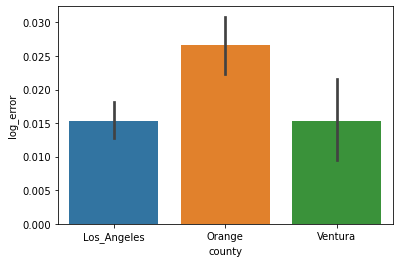

In [12]:
sns.barplot(x='county', y='log_error', data=train)

In [27]:
alpha = 0.05

f_county, p_county = stats.f_oneway(train[train['county'] == 'Los_Angeles'].log_error,
                                    train[train['county'] == 'Orange'].log_error,
                                    train[train['county'] == 'Ventura'].log_error)

f_county, p_county

(10.449262057649184, 2.9096970550933062e-05)

In [29]:
if p_county < alpha:
    print('We reject the null hypothesis. The log_error has a signigicantly difference in those three counties.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. The log_error has a signigicantly difference in those three counties.


#### 2. Orange county seems have the highest average log error, is it because orange county houses size is different than average?

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24886 entries, 21670 to 35434
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcel_id                   24886 non-null  int64  
 1   id                          24886 non-null  int64  
 2   bathroom                    24886 non-null  float64
 3   bedroom                     24886 non-null  int64  
 4   buildingqualitytypeid       24886 non-null  float64
 5   calculatedbathnbr           24886 non-null  float64
 6   square_feet                 24886 non-null  float64
 7   finishedsquarefeet12        24886 non-null  float64
 8   county                      24886 non-null  object 
 9   fullbathcnt                 24886 non-null  float64
 10  heatingorsystemtypeid       24886 non-null  float64
 11  latitude                    24886 non-null  float64
 12  longitude                   24886 non-null  float64
 13  lot_square_feet            

<AxesSubplot:xlabel='county', ylabel='square_feet'>

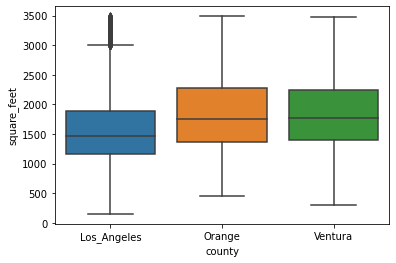

In [32]:
sns.boxplot(data = train, x='county', y='square_feet')

* it is hard to see from the chart, let's do a statistic test

In [36]:
alpha = 0.05

t_ft, p_ft = stats.ttest_1samp(train[train['county'] == 'Orange'].square_feet,
                                 train['square_feet'].mean())

t_ft, p_ft

(23.551756063728206, 8.931433631227062e-118)

In [38]:
if p_ft < alpha:
    print('We reject the null hypothesis. ')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. 


* The houses size in Orange county have a difference than average.

#### 3. is it because house price?

<AxesSubplot:xlabel='county', ylabel='house_value'>

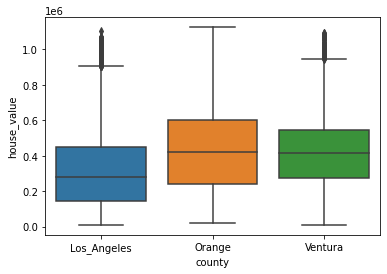

In [39]:
sns.boxplot(data = train, x='county', y='house_value')

In [40]:
alpha = 0.05

t_house_value, p_house_value = stats.ttest_1samp(train[train['county'] == 'Orange'].house_value,
                                 train['house_value'].mean())

t_house_value, p_house_value

(23.47918602554251, 4.318329707470222e-117)

In [41]:
if p_ft < alpha:
    print('We reject the null hypothesis. ')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. 


* The house value has a difference than average.

In [43]:
train[train['county'] == 'Orange'].house_value.mean()

431219.6472844431

In [44]:
train['house_value'].mean()

360131.7151410432

In [ ]:
#### 4. 

Text(0.5, 0, 'Log Error')

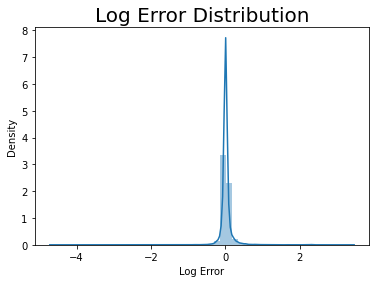

In [45]:
sns.distplot(train.log_error)
plt.title('Log Error Distribution', fontsize=20)
plt.xlabel('Log Error')